In [21]:
import pandas as pd
import networkx as nx
import datetime
import re
import matplotlib.pyplot as plt

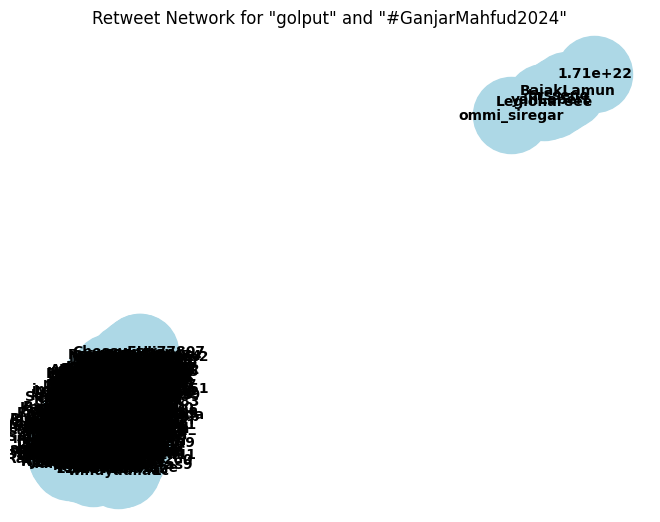

In [6]:
# Load the CSV data into a DataFrame
df = pd.read_csv('merged_new.csv')
# Filter DataFrame for tweets containing "golput" or "#GanjarMahfud2024"
filtered_df = df[df['full_text'].str.contains('golput', case=False) | df['full_text'].str.contains('#GanjarMahfud2024', case=False, na=False)]

# Create a directed graph
G = nx.DiGraph()

# Iterate through the filtered DataFrame and add edges (retweets)
for index, row in filtered_df.iterrows():
    if pd.notnull(row['retweet_count']):
        retweet_count = int(row['retweet_count'])
        if retweet_count > 0:
            user = str(row['username'])
            tweet_id = str(row['id_str'])
            G.add_node(user)
            G.add_node(tweet_id)
            G.add_edge(user, tweet_id, weight=retweet_count)

# Draw the network graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold')
plt.title('Retweet Network for "golput" and "#GanjarMahfud2024"')
plt.show()

In [18]:
# Load the CSV data into a DataFrame
df = pd.read_csv('politk_clean1.csv')

# Create a directed graph
G = nx.DiGraph()

# Process the dataset and add nodes and edges to the graph
for index, row in df.iterrows():
    user_id = row['user_id_str']
    tweet_id = row['id_str']
    tweet_date = datetime.datetime.strptime(row['Date'], '%a %b %d %H:%M:%S +0000 %Y').strftime('%Y-%m-%dT%H:%M:%S')

    G.add_node(user_id, label=row['User'])


    # Extract mentioned users from the tweet text (assuming mentions are in the format @username)
    mentioned_users = re.findall(r'@(\w+)', row['Posts'])

    # Add edges from the current user to mentioned users
    for mentioned_user in mentioned_users:
        G.add_edge(user_id, mentioned_user, start=tweet_date, end=tweet_date, tweet_id=tweet_id)

# Convert the datetime attributes to ISO 8601 date and time representation
for u, v, attrs in G.edges(data=True):
    attrs['start'] = attrs['start'] + 'Z'  # Adding 'Z' for UTC time
    attrs['end'] = attrs['end'] + 'Z'  # Adding 'Z' for UTC time

# Save the graph as GEXF file
nx.write_gexf(G, 'twitter_network_dynamic.gexf')

In [19]:
#Count Golput
# Count occurrences of the word "golput" in the "Posts" section
golput_count = df['Posts'].str.count(r'\bgolput\b', flags=re.IGNORECASE).sum()

print('Number of occurrences of "golput" in the "Posts" section:', golput_count)

Number of occurrences of "golput" in the "Posts" section: 1016


In [20]:
# Count occurrences of the word "#GanjarMahfud2024" in the "Posts" section
ganjar_count = df['Posts'].str.count(r'\#GanjarMahfud2024\b').sum()

print('Number of occurrences of "#GanjarMahfud2024" in the "Posts" section:', ganjar_count)

Number of occurrences of "#GanjarMahfud2024" in the "Posts" section: 940


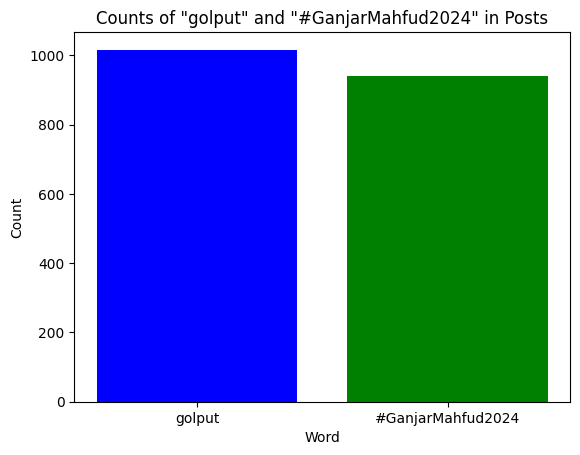

In [22]:
# Create a bar chart
labels = ['golput', '#GanjarMahfud2024']
counts = [golput_count, ganjar_count]

plt.bar(labels, counts, color=['blue', 'green'])
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Counts of "golput" and "#GanjarMahfud2024" in Posts')
plt.show()